<a href="https://colab.research.google.com/github/Terugit/p8-team-g/blob/main/Kaggle%EF%BC%BF%E6%A0%AA%E4%BE%A1%E3%82%B3%E3%83%B3%E3%83%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json 
import os

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Google Colaboratory上からGoogle Drive上のファイルにアクセスできるようにする
from google.colab import drive
drive.mount('/content/drive')

!mkdir ~/.kaggle
!touch /root/.kaggle/kaggle.json
# kaggle.jsonファイルの内容を次の行にコピーしjsonファイルに書き写す
api_token = {"username":"oikawadaisuke","key":"e3ce4f5964b7059090bf86d85bd62b4b"}
with open('/root/.kaggle/kaggle.json', 'w') as file:
 json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c jpx-tokyo-stock-exchange-prediction -p /content/drive/MyDrive/kaggle/jpx-tokyo-stock-exchange-prediction.zip

 99% 231M/233M [00:02<00:00, 58.8MB/s]
100% 233M/233M [00:02<00:00, 89.7MB/s]


In [ ]:
!unzip '/content/drive/MyDrive/kaggle/jpx-tokyo-stock-exchange-prediction/jpx-tokyo-stock-exchange-prediction.zip'

Archive:  /content/drive/MyDrive/kaggle/jpx-tokyo-stock-exchange-prediction/jpx-tokyo-stock-exchange-prediction.zip
  inflating: data_specifications/options_spec.csv  
  inflating: data_specifications/stock_fin_spec.csv  
  inflating: data_specifications/stock_list_spec.csv  
  inflating: data_specifications/stock_price_spec.csv  
  inflating: data_specifications/trades_spec.csv  
  inflating: example_test_files/financials.csv  
  inflating: example_test_files/options.csv  
  inflating: example_test_files/sample_submission.csv  
  inflating: example_test_files/secondary_stock_prices.csv  
  inflating: example_test_files/stock_prices.csv  
  inflating: example_test_files/trades.csv  
  inflating: jpx_tokyo_market_prediction/__init__.py  
  inflating: jpx_tokyo_market_prediction/competition.cpython-37m-x86_64-linux-gnu.so  
  inflating: stock_list.csv          
  inflating: supplemental_files/financials.csv  
  inflating: supplemental_files/options.csv  
  inflating: supplemental_files/s

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import clear_output

In [ ]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from time import time
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from fbprophet import Prophet
from fbprophet import plot
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_data = pd.read_csv('/content/train_files/stock_prices.csv')
df = train_data[(train_data['SecuritiesCode'] == 1301)][['Date','Close']]
df['Date'] =pd.to_datetime(df['Date'])
df = df.rename(columns = {'Date':'ds','Close':'y'})
df =  df.reset_index(drop = True)
df

,ds,y
0,2017-01-04,2742.0
1,2017-01-05,2738.0
2,2017-01-06,2740.0
3,2017-01-10,2748.0
4,2017-01-11,2745.0
...,...,...
1197,2021-11-29,2951.0
1198,2021-11-30,2900.0
1199,2021-12-01,2911.0
1200,2021-12-02,2933.0


In [ ]:
train_data[(train_data['SecuritiesCode'] == 1301)].reset_index(drop=True)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,NaN,False,0.002920
2,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,NaN,False,-0.001092
3,20170110_1301,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,NaN,False,-0.005100
4,20170111_1301,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,NaN,False,-0.003295
...,...,...,...,...,...,...,...,...,...,...,...,...
1197,20211129_1301,2021-11-29,1301,2975.0,2984.0,2951.0,2951.0,14300,1.0,NaN,False,0.003793
1198,20211130_1301,2021-11-30,1301,2953.0,2997.0,2900.0,2900.0,20500,1.0,NaN,False,0.007558
1199,20211201_1301,2021-12-01,1301,2909.0,2936.0,2909.0,2911.0,10600,1.0,NaN,False,0.016706
1200,20211202_1301,2021-12-02,1301,2949.0,2973.0,2933.0,2933.0,15200,1.0,NaN,False,-0.003689


In [ ]:
train_1 = df[:int(len(df)*0.8)]
test_1 = df[int(len(df)*0.8):]

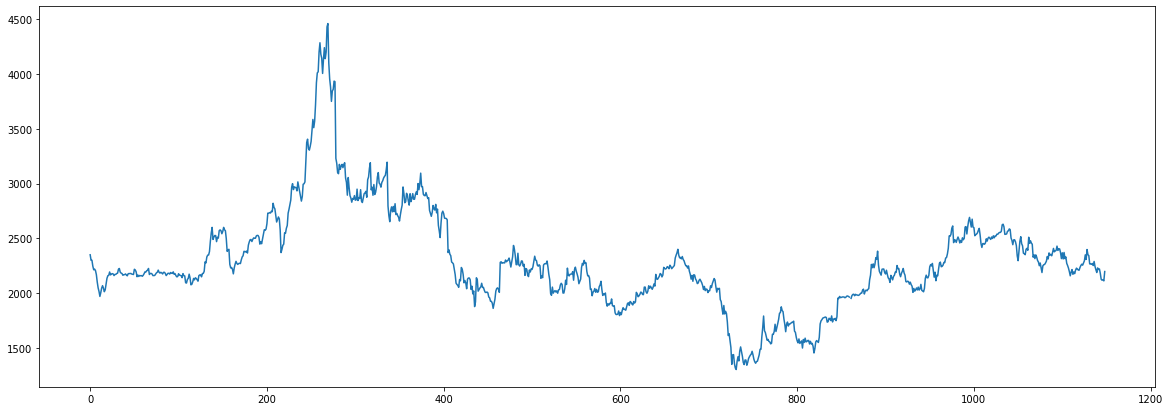

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(df['y'], label='1413')
plt.show()

In [ ]:
model_1 = Prophet(changepoint_range=0.9,changepoint_prior_scale=0.9,n_changepoints=50)
model_1.fit(train_1)

future_frame = model_1.make_future_dataframe(periods=len(test_1), freq='D')
forecast = model_1.predict(future_frame)
plot.plot_plotly(model_1,forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


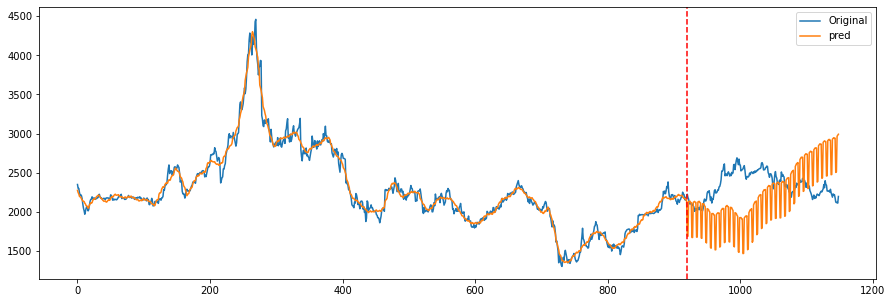

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['y'], label='Original')
plt.plot(forecast['yhat'], label='pred')
plt.axvline(x=len(train_1), c='r', linestyle='--')
plt.legend()
plt.show()

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-03-22,2582.988605,2182.630759,2377.153876,2582.988605,2582.988605,-307.580321,-307.580321,-307.580321,137.424521,137.424521,137.424521,-445.004842,-445.004842,-445.004842,0.0,0.0,0.0,2275.408284
1,2017-03-23,2564.520003,2162.432567,2337.739024,2564.520003,2564.520003,-318.665132,-318.665132,-318.665132,124.127793,124.127793,124.127793,-442.792925,-442.792925,-442.792925,0.0,0.0,0.0,2245.854871
2,2017-03-24,2546.051400,2135.515038,2318.649819,2546.051400,2546.051400,-317.115442,-317.115442,-317.115442,122.028263,122.028263,122.028263,-439.143705,-439.143705,-439.143705,0.0,0.0,0.0,2228.935957
3,2017-03-27,2490.645591,2100.389284,2288.466170,2490.645591,2490.645591,-293.690953,-293.690953,-293.690953,126.982046,126.982046,126.982046,-420.672999,-420.672999,-420.672999,0.0,0.0,0.0,2196.954638
4,2017-03-28,2472.176989,2097.001553,2293.390732,2472.176989,2472.176989,-279.370552,-279.370552,-279.370552,133.072138,133.072138,133.072138,-412.442689,-412.442689,-412.442689,0.0,0.0,0.0,2192.806437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,2021-08-07,2746.570454,-3187.332497,7861.170858,-2936.193564,8041.501931,-242.158676,-242.158676,-242.158676,-321.817444,-321.817444,-321.817444,79.658768,79.658768,79.658768,0.0,0.0,0.0,2504.411778
1145,2021-08-08,2750.235309,-3215.483792,7827.414991,-2976.100223,8098.445315,-239.479139,-239.479139,-239.479139,-321.817317,-321.817317,-321.817317,82.338177,82.338177,82.338177,0.0,0.0,0.0,2510.756169
1146,2021-08-09,2753.900163,-2771.651703,8355.591750,-2999.427942,8148.498329,212.549667,212.549667,212.549667,126.982046,126.982046,126.982046,85.567621,85.567621,85.567621,0.0,0.0,0.0,2966.449830
1147,2021-08-10,2757.565017,-2860.005320,8434.755062,-3059.193258,8194.502543,222.387000,222.387000,222.387000,133.072138,133.072138,133.072138,89.314862,89.314862,89.314862,0.0,0.0,0.0,2979.952017


In [ ]:
rmse = mean_squared_error(test_1['y'], forecast['yhat'][len(train_1):])
print(np.sqrt(rmse))

485.03814825536597


In [ ]:
train_length = len(train_data[(train_data['SecuritiesCode'] == 1301)])
train_length

In [ ]:
train_data = pd.read_csv('/content/train_files/stock_prices.csv')
train_length = len(train_data[(train_data['SecuritiesCode'] == 1301)])
Unique = np.unique(train_data['SecuritiesCode'].values)
df_list = []
count = 0

t1 =  time.time()

for code in Unique:
    clear_output()
    
    count += 1
    print(count)
    
    #セキュリティコードごとにデータを整形
    df =  train_data[(train_data['SecuritiesCode'] == code)][['Date','Target']]
    df['Date'] =pd.to_datetime(df['Date'])
    df = df.rename(columns = {'Date':'ds','Target':'y'})
    df =  df.reset_index(drop = True)
    
    #セキュリティコードごとにProphetで予測
    model_1 = Prophet(changepoint_range=0.9,changepoint_prior_scale=0.9,n_changepoints=50)
    model_1.fit(df)
    future_frame = model_1.make_future_dataframe(periods=365, freq='D')
    forecast = model_1.predict(future_frame)
    
    df_list.append(forecast.loc[train_length:,'yhat'])

t2 = time.time()

elapsed_time = t2 - t1
df_preds_all = pd.concat(df_list, axis=1, sort=False).transpose()
print(f'経過時間:　{elapsed_time}秒')
df_preds_all
df_preds_all.to_csv('/content/drive/MyDrive/kaggle/target_predicted.csv')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2000
経過時間:　8817.811703920364秒


In [ ]:
train_data = pd.read_csv('/content/train_files/stock_prices.csv')
train_length = len(train_data[(train_data['SecuritiesCode'] == 1301)])
Unique = np.unique(train_data['SecuritiesCode'].values)
df_list = []
count = 0

t1 =  time()

for code in Unique:
    clear_output()
    
    count += 1
    print(count)
    
    #セキュリティコードごとにデータを整形
    df =  train_data[(train_data['SecuritiesCode'] == code)][['Date','Target']]
    df['Date'] =pd.to_datetime(df['Date'])
    df = df.rename(columns = {'Date':'ds','Target':'y'})
    df =  df.reset_index(drop = True)
    df['cap'] = df['y'].max()*2
    df['floor'] = df['y'].min()
    
    #セキュリティコードごとにProphetで予測
    model_1 = Prophet(changepoint_range=0.9,changepoint_prior_scale=0.9,n_changepoints=50)
    model_1.fit(df)
    future_frame = model_1.make_future_dataframe(periods=365, freq='D')
    future_frame['cap'] = df['y'].max()*2
    future_frame['floor'] = df['y'].min()
    forecast = model_1.predict(future_frame)
    
    df_list.append(forecast.loc[train_length:,'yhat'])

t2 = time()

elapsed_time = t2 - t1
df_preds_all = pd.concat(df_list, axis=1, sort=False).transpose()
print(f'経過時間:　{elapsed_time}秒')
df_preds_all
df_preds_all.to_csv('/content/drive/MyDrive/kaggle/target_predicted_new.csv')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2000
経過時間:　13557.801972389221秒


In [ ]:
df_preds_all = pd.read_csv('/content/drive/MyDrive/kaggle/target_predicted.csv')

In [ ]:
time()

1654157583.5954072

In [ ]:
train_length = len(train_data[(train_data['SecuritiesCode'] == 1301)])
Unique = np.unique(train_data['SecuritiesCode'].values)

df_preds = pd.read_csv('/content/drive/MyDrive/kaggle/target_predicted.csv')


del df_preds['Unnamed: 0']

Unique = np.unique(train_data['SecuritiesCode'].values)
Unique = list(Unique)
Unique = [int(i) for i in Unique]

for i in range(365):
    df_preds = df_preds.rename(columns={f'1{202+i}':f'{i+1}'})

df_preds = df_preds.reset_index(drop=True)
Unique_dict= {}
for i, unique in enumerate(Unique):
    Unique_dict[i] = unique
df_preds = df_preds.rename(index=Unique_dict)

df_null_index = pd.DataFrame([df_preds.isnull().sum(axis=1)])
df_null_index = df_null_index.transpose().rename(columns={0:'null_exist'})
df_null_exist = df_null_index[(df_null_index['null_exist'] != 0)]


null_list = [int(i) for i in list(df_null_exist.index)]


train_data['Date'] = pd.to_datetime(train_data['Date'])
df_x =  train_data[(train_data['SecuritiesCode'] == 1301)][['Date','Target']].reset_index(drop=True)

for i in range(1202):
    df_x.loc[i,'Target'] = np.nan

df_x['Date'] =pd.to_datetime(df_x['Date'])

dates = df_x['Date'].values


null_dict =  {}
for null_Secu in null_list:
    df_null_Secu = df_x.copy()
    null_dict[null_Secu] = df_null_Secu

from tqdm import tqdm
for code, df in tqdm(null_dict.items()):
    
    for date in dates:
        if train_data[(train_data['SecuritiesCode'] == code)]['Date'].isin([date]).any():
            df.loc[df['Date']==date,'Target'] = train_data[(train_data['SecuritiesCode'] == code) & (train_data['Date'] == date)].loc[:,'Target'].values
        else:
            continue


for df in tqdm(null_dict.values()):
    df.loc[:,['Target']] = df.loc[:,['Target']].interpolate(method='linear',limit_direction='both')


train_length = len(train_data[(train_data['SecuritiesCode'] == 1301)])
df_list = []
count = 0

t1 =  time()

for code, df in null_dict.items():
    clear_output()
    
    count += 1
    print(count)
    
    #セキュリティコードごとにデータを整形
    df = df.rename(columns = {'Date':'ds','Target':'y'})
    df =  df.reset_index(drop = True)
    df['cap'] =  df['y'].max()*2
    df['floor'] =  df['y'].min()*0.8
    
    #セキュリティコードごとにProphetで予測
    model_1 = Prophet(growth='logistic',changepoint_range=0.9,changepoint_prior_scale=0.9,n_changepoints=50)
    model_1.fit(df)
    future_frame = model_1.make_future_dataframe(periods=365, freq='D')
    future_frame['cap'] = df['y'].max()*2
    future_frame['floor'] = df['y'].min()*0.8
    forecast = model_1.predict(future_frame)
    
    df_list.append(forecast.loc[train_length:,'yhat'])

t2 = time()

elapsed_time = t2 - t1
df_preds_all = pd.concat(df_list, axis=1, sort=False).transpose()
print(f'経過時間:　{elapsed_time}秒')
df_preds_all.to_csv('/content/drive/MyDrive/kaggle/target_null_predicted_new.csv')


df_preds_null = pd.read_csv('/content/drive/MyDrive/kaggle/target_null_predicted_new.csv')


del df_preds_null['Unnamed: 0']


for i in range(365):
    df_preds_null = df_preds_null.rename(columns={f'1{202+i}':f'{i+1}'})

for i,unique in enumerate(null_list):
    df_preds_null = df_preds_null.rename(index={i:unique})

df_preds_null

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


135
経過時間:　2026.3675076961517秒


,1,2,3,4,5,6,7,8,9,10,...,356,357,358,359,360,361,362,363,364,365
1375,0.098109,0.098136,-0.004424,-0.004348,-0.004545,-0.003552,-0.003429,0.098376,0.098437,-0.004086,...,-0.008057,-0.007908,0.093911,0.093970,-0.008567,-0.008478,-0.008671,-0.007684,-0.007578,0.094202
1413,0.087327,0.087065,0.001517,-0.003446,-0.002575,0.003572,0.000723,0.084707,0.084290,-0.001336,...,0.001056,-0.000879,0.083963,0.084325,-0.000616,-0.005004,-0.003605,0.003010,0.000561,0.084866
1431,-0.465373,-0.465213,0.012855,0.014277,0.014517,0.019987,0.015137,-0.464576,-0.464585,0.013271,...,0.019208,0.014093,-0.465797,-0.465891,0.011974,0.013251,0.013406,0.018855,0.014046,-0.465564
1887,0.180233,0.180496,-0.001615,-0.000172,0.000749,0.003030,0.002209,0.181683,0.181783,-0.000512,...,-0.001265,-0.002135,0.177351,0.177525,-0.004637,-0.003206,-0.002258,0.000089,-0.000628,0.178984
2932,0.604162,0.604188,-0.005929,-0.006520,-0.006864,-0.006567,-0.007645,0.604315,0.604331,-0.005797,...,-0.021622,-0.022710,0.589249,0.589270,-0.020847,-0.021434,-0.021771,-0.021465,-0.022533,0.589438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9278,0.452146,0.451954,-0.000887,-0.003472,-0.003447,-0.000405,-0.000095,0.451227,0.451219,-0.001410,...,0.001394,0.001738,0.453036,0.452940,0.000160,-0.002404,-0.002400,0.000578,0.000781,0.451953
9279,0.520482,0.520680,0.007701,0.007352,0.006082,0.007505,0.007954,0.521136,0.521055,0.007774,...,0.004870,0.005265,0.518499,0.518571,0.005538,0.005207,0.004023,0.005596,0.006253,0.519694
9434,0.103252,0.103206,-0.000376,-0.000595,-0.000973,-0.000396,0.000165,0.103557,0.103709,0.000316,...,-0.000560,-0.000272,0.102813,0.102634,-0.001110,-0.001515,-0.002098,-0.001742,-0.001411,0.101746
9450,0.068388,0.068319,-0.001456,-0.005850,-0.004567,-0.004534,-0.005048,0.068500,0.068579,-0.001086,...,-0.005439,-0.006430,0.066642,0.066261,-0.003835,-0.008550,-0.007578,-0.007839,-0.008620,0.064692
